In [1]:
# Import required packages and list out the cities which has ikea
import pandas as pd
from matplotlib.pyplot import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

ikea_cities = ['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', \
               'Malmö', 'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 'Västerås', 'Älmhult', 'Örebro','Mölndal', \
              'Huddinge','Järfälla']

In [2]:
# Load the dataset into a dataframe
df_ikea = pd.read_csv('ikea_kommun_data.txt',sep = '\t',encoding = 'ISO8859')
df_ikea.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [3]:
df_ikea.shape

(207, 12)

In [4]:
df_ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [5]:
df_ikea.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [6]:
# Made copy of the dataframe to have a copy of actual dataset 
ikea = df_ikea.copy()

# Converted Kommun Name as row index
ikea.set_index('Kommun_name',inplace = True)
ikea.index.names = [None]
ikea.drop(['Infrast','Border','Year','Kommun_code'],inplace = True, axis =1)
ikea

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774
Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869
Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935
Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627
...,...,...,...,...,...,...,...
Hällefors,52,33,7220,368,0.050970,78.97019,5.358015
Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976
Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346
Kumla,152,98,20456,1598,0.078119,77.73047,15.661890


Dropped below columns.
Categorical columns Infrast and Border.
Kommun Code is for uniquely identifying kommun.
Year has same values in all the rows.

In [7]:
ikea.isnull().sum()

Revenue                  0
Employee                 0
Population               0
Population_University    0
Percent_University       0
Productivity             0
SalesIndex               0
dtype: int64

In [8]:
correlation = ikea.corr()
correlation

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
Revenue,1.000000,0.991840,0.976670,0.959100,0.454964,0.151749,1.000000
Employee,0.991840,1.000000,0.984039,0.975713,0.427254,0.095187,0.991840
Population,0.976670,0.984039,1.000000,0.982633,0.476774,0.101636,0.976670
Population_University,0.959100,0.975713,0.982633,1.000000,0.478124,0.068160,0.959100
Percent_University,0.454964,0.427254,0.476774,0.478124,1.000000,0.051358,0.454964
Productivity,0.151749,0.095187,0.101636,0.068160,0.051358,1.000000,0.151749
SalesIndex,1.000000,0.991840,0.976670,0.959100,0.454964,0.151749,1.000000


Text(0.5, 1.0, 'Correlation between the fearures\n')

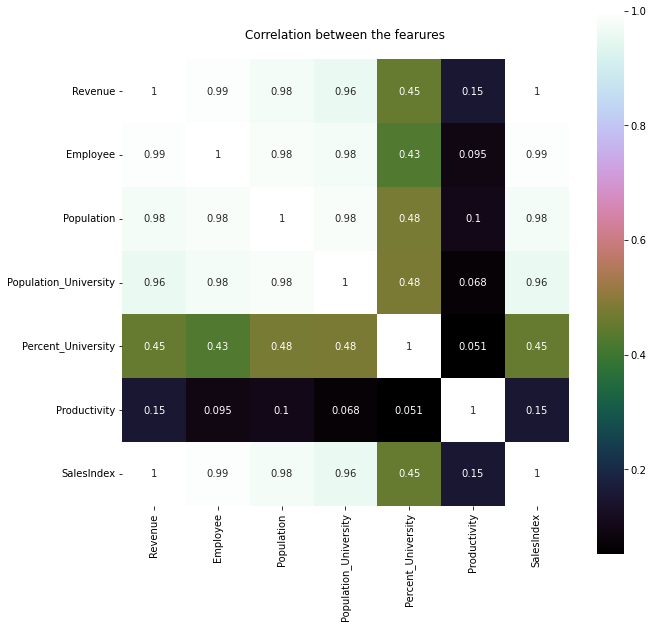

In [9]:
figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
title('Correlation between the fearures\n')

In [10]:
# Scaling all the columns 
ikea_scaled = StandardScaler().fit_transform(ikea)
ikea_scaled

array([[ 0.0171844 , -0.16924445, -0.36696823, ..., -0.63900455,
         3.73881675,  0.0171844 ],
       [ 1.02597326,  0.75220563,  0.42373029, ...,  1.01559689,
         0.92207436,  1.02597326],
       [ 1.31239193,  0.9501975 ,  0.76752138, ...,  1.41974542,
         1.01078006,  1.31239193],
       ...,
       [ 1.93284171,  1.6935234 ,  1.51252197, ...,  1.14631992,
         0.45745365,  1.93284171],
       [-0.32726194, -0.291191  , -0.21113965, ..., -0.47568966,
        -0.49200198, -0.32726194],
       [-0.33693322, -0.31379907, -0.34869805, ..., -0.63275046,
         0.20411204, -0.33693322]])

In [11]:
# Perform Principle Component Analysis on scaled data for dimention reduction
pca = PCA()
pca.fit(ikea_scaled)
pca.explained_variance_ratio_

array([7.41009137e-01, 1.41464113e-01, 1.07175378e-01, 7.71455805e-03,
       2.00679285e-03, 6.30021530e-04, 7.15665287e-20])

Text(0, 0.5, 'Percentage of Explained Variance')

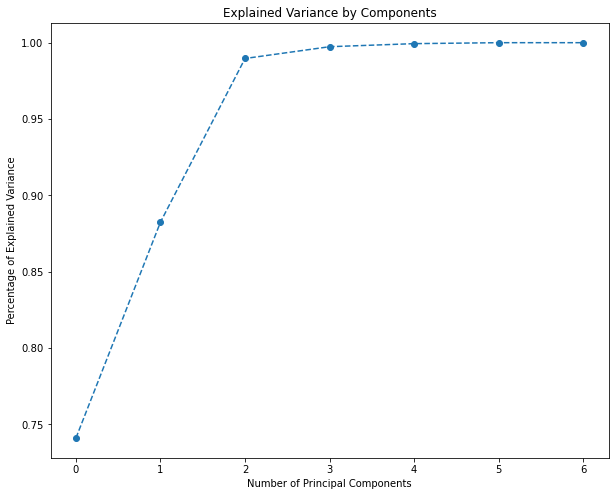

In [12]:
figure(figsize =(10, 8))
plot(range(0,7),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
# labeling title,x and y axis
title('Explained Variance by Components')
xlabel('Number of Principal Components')
ylabel('Percentage of Explained Variance')

We can clearly observe 2 components are required for less than 90 percent total variance and 3 can give more than 95 % of variance. So we proceed with 3 components.

In [13]:
pca = PCA(n_components = 0.95)
pca.fit(ikea_scaled)
pca.explained_variance_ratio_

array([0.74100914, 0.14146411, 0.10717538])

In [14]:
# Create a new data frame with 3 PCA components on scaled data
ikea_scaled_pca = pca.transform(ikea_scaled)
ikea_scaled_pca.shape

(207, 3)

In order to decide the number of clusters to be formed, i have tried to iterate the clustering for 10 times, that is for k=1,2,3..10. Every iteration with each value of K is further iterated 1000 times to make better clusters for each K value. Random state is set to have same results on every execution. 

C:\Users\Krishna Bharat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


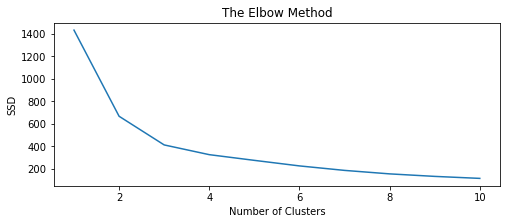

In [15]:
# Perform K means Clustering
ssd =[]
for i in range (1,11): 
    kmeans = KMeans(n_clusters = i,max_iter = 1000,random_state = 7)
    kmeans.fit(ikea_scaled_pca)
    ssd.append(kmeans.inertia_)
figure(figsize = (8,3))
plot(range(1,11),ssd)
title('The Elbow Method')
xlabel('Number of Clusters')
ylabel('SSD')
show()

I have decided to proceed with 3 clusters as it has lesser squared sum difference coampared to 1 and 2 and not much difference compare to 4 and above.

In [16]:
kmeans_pca = KMeans(n_clusters = 3, max_iter = 1000,random_state = 7)
data_clusters = kmeans_pca.fit_predict(ikea_scaled_pca)
data_clusters

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0])

In [17]:
# Create a list for each row checking if it has ikea or not and denoting with 1 if ikea is present a 0 if not.
has_ikea = []
for i in df_ikea['Kommun_name']:
    has_ikea.append(1 if i in ikea_cities else 0)

# Adding the Principle Components, has ikea and clusters information to the actual data frame to analyse further.
ikea_kmeans = pd.concat([df_ikea, pd.DataFrame(has_ikea), pd.DataFrame(ikea_scaled_pca), pd.DataFrame(data_clusters)],axis = 1)
ikea_kmeans.columns.values[-5:] = ['Has_ikea','Component_1','Component_2','Component_3','Cluster']
ikea_kmeans

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1,-0.256827,3.795376,-0.354488,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,1.822138,0.826915,0.626856,2
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,2.545419,0.857841,0.874369,2
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0.286170,0.161894,0.314779,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,-0.291902,-0.215088,0.834730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,0,-1.068566,-0.337967,-0.938364,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,0,-1.011093,0.640097,-0.813069,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,1,3.817212,0.262281,0.233111,2
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,0,-0.737757,-0.437497,-0.333067,0


C:\Users\Krishna Bharat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


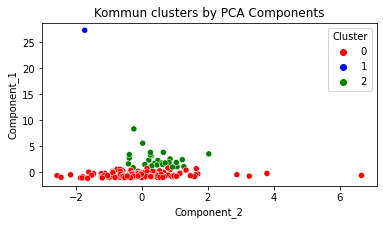

In [18]:
x = ikea_kmeans['Component_2']
y = ikea_kmeans['Component_1']
figure(figsize = (6,3))
sns.scatterplot(x,y,hue = ikea_kmeans['Cluster'],palette = ['r','b','g'])
title('Kommun clusters by PCA Components')
show()

# Analysing the clusters

In [19]:
ikea_kmeans[ikea_kmeans['Cluster'] == 0].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
count,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0
mean,1089.242938,2010.0,383.847458,211.118644,19891.514124,1898.355932,0.086854,88.464811,39.551163,0.039548,0.045198,0.016949,-0.548942,-0.069439,-0.137822,0.0
std,524.367750,0.0,438.150613,227.512818,14041.884470,1652.637373,0.027466,28.591230,45.146492,0.195448,0.208327,0.129447,0.429937,1.026293,0.618478,0.0
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000,0.000000,-1.223970,-2.567451,-1.110877,0.0
25%,643.000000,2010.0,96.000000,57.000000,10177.000000,732.000000,0.066503,74.034550,9.891720,0.000000,0.000000,0.000000,-0.870623,-0.595350,-0.567376,0.0
50%,1266.000000,2010.0,203.000000,124.000000,14840.000000,1144.000000,0.082552,86.935390,20.916867,0.000000,0.000000,0.000000,-0.674854,-0.112772,-0.244077,0.0
75%,1465.000000,2010.0,563.000000,282.000000,26304.000000,2657.000000,0.099561,100.621400,58.010817,0.000000,0.000000,0.000000,-0.291902,0.316241,0.148797,0.0
max,2583.000000,2010.0,2309.000000,1109.000000,82608.000000,8023.000000,0.211698,275.636330,237.916478,1.000000,1.000000,1.000000,0.829365,6.660210,2.809915,0.0


In [20]:
ikea_kmeans[ikea_kmeans['Cluster'] == 1]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1,27.36224,-1.728776,-3.542441,1


In [21]:
ikea_kmeans[ikea_kmeans['Cluster'] == 2].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.0
mean,838.586207,2010.0,3887.758621,1796.758621,95952.137931,15070.620690,0.157762,109.827211,400.589796,0.068966,0.0,0.379310,2.406911,0.483427,0.963343,2.0
std,585.173998,0.0,2204.145148,1098.520877,53193.842764,10039.710445,0.049116,14.386280,227.112365,0.257881,0.0,0.493804,1.594152,0.566477,1.269852,0.0
min,123.000000,2010.0,500.000000,259.000000,31330.000000,3396.000000,0.082813,84.567850,51.519376,0.000000,0.0,0.000000,0.772029,-0.403977,-0.758354,2.0
25%,184.000000,2010.0,2438.000000,1116.000000,64032.000000,9507.000000,0.126405,103.273100,251.208477,0.000000,0.0,0.000000,1.471688,0.183678,0.081850,2.0
50%,780.000000,2010.0,3438.000000,1489.000000,85753.000000,12266.000000,0.140617,108.235130,354.247229,0.000000,0.0,0.000000,1.864573,0.469048,0.626856,2.0
75%,1380.000000,2010.0,5119.000000,2280.000000,110488.000000,16395.000000,0.190654,118.363360,527.455371,0.000000,0.0,1.000000,3.176330,0.826915,1.373779,2.0
max,1880.000000,2010.0,11217.000000,5740.000000,298963.000000,50084.000000,0.269646,151.001500,1155.785679,1.000000,0.0,1.000000,8.348672,2.031754,4.152145,2.0


Looking the the description of 3 clusters, we can identify that the clusters can be categorized as Small(0), Medium(2) and Large(1).

In [22]:
# Kommunes with Ikea in it.
ikea_kmeans[ikea_kmeans['Has_ikea'] == 1]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1,-0.256827,3.795376,-0.354488,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,1.822138,0.826915,0.626856,2
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,2.545419,0.857841,0.874369,2
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,2.404254,1.229357,0.426397,2
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,3.511903,2.031754,0.086151,2
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.71780,3389.665819,1,0,1,27.362240,-1.728776,-3.542441,1
33,380,2010,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.598890,0,0,1,5.585608,0.027990,1.373779,2
52,580,2010,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,1,3.813003,0.654258,1.157968,2
64,680,2010,Jönköping,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,1,3.176330,0.286309,0.081850,2
75,765,2010,Älmhult,847,853,15603,1511,0.096840,49.76318,87.273823,0,0,1,-0.275267,-1.469907,-0.069183,0


# New Store Suggestions

I have decided to analyze clusters Small and Medium for 3 different columns Population, Revenue and Employee and decide most suitable 3 cities from the results where a new store can be setup.

In [23]:
ikea_kmeans[(ikea_kmeans['Has_ikea'] == 0) & (ikea_kmeans['Cluster'] == 0)].sort_values(by = 'Population',ascending = False)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
10,127,2010,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,0,0.660100,1.654467,-0.037309,0
12,136,2010,Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0,0,0,0.527854,-0.757742,-0.417577,0
133,1383,2010,Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0,0,0,0.579155,-0.659533,0.019416,0
90,980,2010,Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,1,0,0,0.515686,0.295410,0.170168,0
26,188,2010,Norrtälje,1191,678,56080,4663,0.083149,88.03509,122.719153,0,0,0,0.146416,-0.113288,-0.403311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,0,-1.011093,0.640097,-0.813069,0
144,1438,2010,Dals-Ed,112,42,4692,301,0.064152,133.64186,11.540340,0,1,0,-0.866611,1.591859,-0.527704,0
186,1760,2010,Storfors,11,10,4273,250,0.058507,55.12727,1.133426,0,0,0,-1.120090,-1.196844,-0.792243,0
188,1762,2010,Munkfors,15,18,3771,174,0.046142,41.76308,1.545581,0,0,0,-1.223970,-1.653441,-1.110877,0


In [24]:
ikea_kmeans[(ikea_kmeans['Has_ikea'] == 0) & (ikea_kmeans['Cluster'] == 2)].sort_values(by = 'Population',ascending = False)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,0,2.712400,-0.375580,-0.351839,2
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,0,3.336683,0.260809,3.473684,2
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,0,1.772410,0.711329,-0.179171,2
42,484,2010,Eskilstuna,2844,1485,96311,9898,0.102771,95.97915,293.042210,0,0,0,1.471688,0.093728,-0.223121,2
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,0,1.765598,0.609110,0.339543,2
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,0,2.333518,0.216721,2.008681,2
20,181,2010,Södertälje,2191,894,86246,8734,0.101268,122.82270,225.757905,0,0,0,1.035277,1.070070,-0.074675,2
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,0,1.869286,1.048086,0.886046,2
125,1290,2010,Kristianstad,2739,1285,79543,9507,0.119520,106.82248,282.223141,0,0,0,1.379541,0.469048,0.247989,2
134,1384,2010,Kungsbacka,2139,1038,75025,10461,0.139434,103.27310,220.399890,0,0,0,1.220044,0.307817,0.791789,2


In [25]:
ikea_kmeans[(ikea_kmeans['Has_ikea'] == 0) & (ikea_kmeans['Cluster'] == 0)].sort_values(by = 'Revenue',ascending = False)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
171,1488,2010,Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0,0,0,0.693616,0.160045,0.026456,0
98,1231,2010,Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0,0,0,0.250564,0.542426,-0.038952,0
38,480,2010,Nyköping,1642,708,51644,5487,0.106247,116.22877,169.189631,0,0,0,0.494622,0.859435,0.157912,0
133,1383,2010,Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0,0,0,0.579155,-0.659533,0.019416,0
90,980,2010,Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,1,0,0,0.515686,0.295410,0.170168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,512,2010,Ydre,17,14,3672,318,0.086601,60.85477,1.751659,0,0,0,-0.941676,-1.036099,-0.113944,0
15,140,2010,Nykvarn,16,20,9331,891,0.095488,40.09256,1.648620,0,0,0,-0.880219,-1.795560,0.048997,0
188,1762,2010,Munkfors,15,18,3771,174,0.046142,41.76308,1.545581,0,0,0,-1.223970,-1.653441,-1.110877,0
48,560,2010,Boxholm,11,2,5221,301,0.057652,275.63633,1.133426,0,0,0,-0.631040,6.660210,-0.412113,0


In [26]:
ikea_kmeans[(ikea_kmeans['Has_ikea'] == 0) & (ikea_kmeans['Cluster'] == 2)].sort_values(by = 'Revenue',ascending = False)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,0,2.712400,-0.375580,-0.351839,2
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,0,1.492215,0.630143,-0.758354,2
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,0,0,0,2.243726,0.488822,2.339243,2
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,0,3.336683,0.260809,3.473684,2
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,0,1.772410,0.711329,-0.179171,2
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,0,1.869286,1.048086,0.886046,2
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,0,1.765598,0.609110,0.339543,2
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,0,2.333518,0.216721,2.008681,2
42,484,2010,Eskilstuna,2844,1485,96311,9898,0.102771,95.97915,293.042210,0,0,0,1.471688,0.093728,-0.223121,2
125,1290,2010,Kristianstad,2739,1285,79543,9507,0.119520,106.82248,282.223141,0,0,0,1.379541,0.469048,0.247989,2


In [27]:
ikea_kmeans[(ikea_kmeans['Has_ikea'] == 0) & (ikea_kmeans['Cluster'] == 0)].sort_values(by = 'Employee',ascending = False)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
133,1383,2010,Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0,0,0,0.579155,-0.659533,0.019416,0
171,1488,2010,Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0,0,0,0.693616,0.160045,0.026456,0
12,136,2010,Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0,0,0,0.527854,-0.757742,-0.417577,0
98,1231,2010,Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0,0,0,0.250564,0.542426,-0.038952,0
90,980,2010,Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,1,0,0,0.515686,0.295410,0.170168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1446,2010,Karlsborg,30,16,6752,715,0.105895,93.96693,3.091163,0,0,0,-0.718611,0.110404,0.398013,0
46,512,2010,Ydre,17,14,3672,318,0.086601,60.85477,1.751659,0,0,0,-0.941676,-1.036099,-0.113944,0
113,1275,2010,Perstorp,22,12,7061,434,0.061464,91.87878,2.266853,0,0,0,-0.993515,0.105668,-0.660643,0
186,1760,2010,Storfors,11,10,4273,250,0.058507,55.12727,1.133426,0,0,0,-1.120090,-1.196844,-0.792243,0


In [28]:
ikea_kmeans[(ikea_kmeans['Has_ikea'] == 0) & (ikea_kmeans['Cluster'] == 2)].sort_values(by = 'Employee',ascending = False)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,0,2.712400,-0.375580,-0.351839,2
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,0,1.492215,0.630143,-0.758354,2
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,0,3.336683,0.260809,3.473684,2
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,0,0,0,2.243726,0.488822,2.339243,2
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,0,2.333518,0.216721,2.008681,2
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,0,1.772410,0.711329,-0.179171,2
42,484,2010,Eskilstuna,2844,1485,96311,9898,0.102771,95.97915,293.042210,0,0,0,1.471688,0.093728,-0.223121,2
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,0,1.765598,0.609110,0.339543,2
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,0,1.869286,1.048086,0.886046,2
125,1290,2010,Kristianstad,2739,1285,79543,9507,0.119520,106.82248,282.223141,0,0,0,1.379541,0.469048,0.247989,2


Top 3 Kommuns from each of the 6 Filter conditions:

---Population:

Botkyrka,Haninge,Varberg

Norrköping,Lund,Borås

---Revenue:

Trollhättan,Burlöv,Nyköping

Norrköping,Falkenberg,Täby

---Employee:

Varberg,Trollhättan,Haninge

Norrköping,Falkenberg,Lund

Unique List:
    
Botkyrka,Haninge,Varberg, Borås, Trollhättan,Burlöv,Nyköping,Norrköping,Falkenberg,Täby,Huddinge,Lund

Botkyrka,Haninge has Huddinge as neighbour

Trollhättan has Uddevalla as neighbour

Burlöv has Malmo as neighbour

Norrköping has Linkoping as neighbour

Täby has Jarfalla nearby but not immediate neighbour

Lund has Malmo nearby but not immediate neighbour

Below Kommuns Doesnt have any Stores in a very closer distance.
Nyköping
Varberg
Borås
Falkenberg

Varberg and Falkenberg are neighbours so we can go with one of them.

In [29]:
ikea_kmeans[(ikea_kmeans['Kommun_name'] == 'Varberg') | (ikea_kmeans['Kommun_name'] == 'Falkenberg')]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Has_ikea,Component_1,Component_2,Component_3,Cluster
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,0,1.492215,0.630143,-0.758354,2
133,1383,2010,Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0,0,0,0.579155,-0.659533,0.019416,0


So on comparing the features I prefered Falkenberg over Varberg as most of the features are dominanted for it.

Finally I would suggest below 3 Stores.

Nykoping

Boras

Falkenberg